
# Fasion MNIST

Vamos a reentrenar nuestra VGG pero con el conjunto de datos de moda

In [42]:
%matplotlib inline

from tensorflow.keras.utils                import to_categorical
from tensorflow                            import keras 
from tensorflow.keras                      import backend as K
from tensorflow.keras.preprocessing.image  import load_img
from tensorflow.keras.layers               import Input, Dense, Flatten, Lambda, Dropout
from tensorflow.keras.layers               import AveragePooling2D
from tensorflow.keras.optimizers           import Adam
from tensorflow.keras.models               import Sequential, Model, load_model
from tensorflow.keras                      import applications  
from tensorflow.keras.datasets             import fashion_mnist
from tensorflow.keras                      import layers
from tensorflow.keras.applications.vgg16   import VGG16
import tensorflow as tf
import PIL
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt


In [27]:
((X_tr, y_tr),(X_ts,y_ts))= tf.keras.datasets.fashion_mnist.load_data()

In [75]:
X_ts = X_ts.reshape(-1,28,28,1).astype('float32') / 255
X_tr = X_tr.reshape(-1,28,28,1).astype('float32') / 255
X_tr.shape

(60000, 28, 28, 1)

In [76]:
X_ts.reshape(-1,28,28,1).shape

(10000, 28, 28, 1)

In [77]:
Y_ts = to_categorical(y_ts)
Y_tr = to_categorical(y_tr)
Y_tr.shape

(60000, 10)

(60000, 10)

### Aplicaciones de Keras

![Aplicaciones](./keras_aplications.png)

Keras ya tiene modelos preentrenados que pueden ver en [keras applications](https://keras.io/api/applications/) que tiene varias redes, entre ellas VGG, pero también muchas otras muy sofisticadas que usarán dependiendo de su problema.

No estaría mal que las revisaran.

In [33]:
vgg = VGG16(input_shape=(32,32,3), include_top=False, weights="imagenet")

for ly in vgg.layers:
    ly.trainable = False

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 8)         80        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 16)        1168      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               295040    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [36]:
modelo = load_model('conv_digits.h5')
modelo.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 8)         80        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 16)        1168      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               295040    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [65]:
nuevo = Sequential()
for ly in range(len(modelo.layers)-3):
    nuevo.add(modelo.layers[ly])

for ly in nuevo.layers:
    ly.trainable = False



In [66]:
nuevo.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 8)         80        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 16)        1168      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0         
Total params: 1,248
Trainable params: 0
Non-trainable params: 1,248
_________________________________________________________________


In [67]:
nuevo.add(Dense(128, activation='tanh', name="densa_a" ))
nuevo.add(Dropout(0.5, name="dropout_a"))
nuevo.add(Dense(64, activation='tanh', name="densa_b" ))
nuevo.add((Dropout(0.25, name="dropout_b")))
nuevo.add(Dense(10, activation="softmax"))

In [84]:
nuevo.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 8)         80        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 16)        1168      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0         
_________________________________________________________________
densa_a (Dense)              (None, 128)               295040    
_________________________________________________________________
dropout_a (Dropout)          (None, 128)              

In [81]:
opt = Adam(learning_rate=1e-3)
nuevo.compile(
    loss = "categorical_crossentropy",
    optimizer = opt,
    metrics = ['accuracy']
)

In [83]:
H = nuevo.fit(x=X_tr, y=Y_tr,
             batch_size=32,
             epochs=10,
             verbose=4)

Train on 60000 samples
Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10


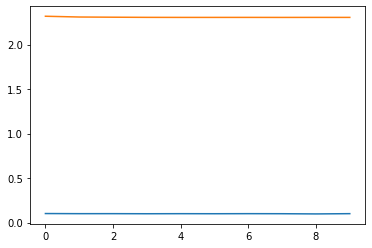

In [91]:
plt.plot(H.history['accuracy'])
plt.plot(H.history['loss'])

In [92]:
nuevo.evaluate(X_ts,Y_ts)

10000/10000 [==============================] - 5s 531us/sample - loss: 2.3039 - accuracy: 0.1000


[2.303914120864868, 0.1]